# CE7455 Assignment 3

Peng Hongyi (G2105029E)

In [2]:
import torch 
from torch import nn
transformer = nn.Transformer(d_model=512, nhead=8, 
                            num_encoder_layers=1, 
                            dim_feedforward=1024)
print(sum(p.numel() for p in transformer.encoder.parameters()))

2103808


In [3]:
for num_layer in range(1, 13, 1):
    transformer = nn.Transformer(d_model=512, nhead=8, 
                            num_encoder_layers=num_layer, 
                            dim_feedforward=1024)
    print(f'Num Layer{num_layer} | Num parameters {sum(p.numel() for p in transformer.encoder.parameters())}')

Num Layer1 | Num parameters 2103808
Num Layer2 | Num parameters 4206592
Num Layer3 | Num parameters 6309376
Num Layer4 | Num parameters 8412160
Num Layer5 | Num parameters 10514944
Num Layer6 | Num parameters 12617728
Num Layer7 | Num parameters 14720512
Num Layer8 | Num parameters 16823296
Num Layer9 | Num parameters 18926080
Num Layer10 | Num parameters 21028864
Num Layer11 | Num parameters 23131648
Num Layer12 | Num parameters 25234432


In [4]:
import pandas as pd
results = []
num_layers = list(range(1, 13, 1))
d_models = [512, 1024, 2048]
for num_layer in num_layers:
    for d_model in d_models:
        transformer = nn.Transformer(d_model=d_model, nhead=8, 
                            num_encoder_layers=num_layer, 
                            dim_feedforward=1024)
        num_parameter = sum(p.numel() for p in transformer.encoder.parameters())
        results.append([num_parameter, num_layer, d_model])
        # print(f'Num Layer{num_layer} | d_model {d_model} | Num parameters {num_parameter}')
results = pd.DataFrame(results, columns=['num_parameter','num_layer', 'd_model'])

Text(0, 0.5, 'Num parameters')

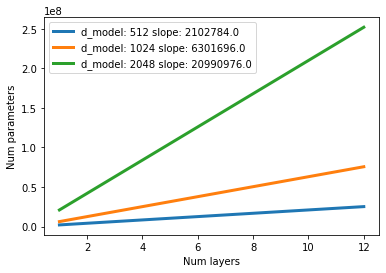

In [46]:
import matplotlib.pyplot as plt
ax = plt.figure().add_subplot()
slopes = []
for d_model in results['d_model'].unique():
    x = results[results['d_model'] == d_model]['num_layer'].values
    y = results[results['d_model'] == d_model]['num_parameter'].values
    slope = (y[-1]-y[0])/(x[-1]-x[0])
    ax.plot(x, y, linewidth=3, label=f'd_model: {d_model} slope: {slope:.1f}')
plt.legend()
plt.xlabel('Num layers')
plt.ylabel('Num parameters')
